# Assignment for Business Analyst Intern @Jar 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
orders = pd.read_csv("List_of_Orders.csv")  
order_details = pd.read_csv("Order_Details.csv") 
sales_target = pd.read_csv("Sales_Target.csv")

In [23]:
orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [24]:
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [42]:
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


# Part 1: Sales and Profitability Analysis 
• Merge the List of Orders and Order Details datasets on the basis of Order ID. 
Calculate the total sales (Amount) for each category across all orders.

• For each category, calculate the average profit per order and total profit margin 
(profit as a percentage of Amount). 

• Identify the top-performing and underperforming categories based on these 
metrics. Also, suggest reasons for their performance di erences. 

In [26]:
merged_data = pd.merge(order_details, orders, on="Order ID")
merged_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [39]:
sales_by_category = merged_data.groupby("Category")["Amount"].sum().reset_index()
sales_by_category.columns = ["Category", "Total Sales"]

In [40]:
sales_by_category.head()

,Category,Total Sales
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


In [43]:
profit_by_category = merged_data.groupby("Category")["Profit"].sum().reset_index()
profit_by_category.columns = ["Category", "Total Profit"]
profit_by_category.head()

,Category,Total Profit
0,Clothing,11163.0
1,Electronics,10494.0
2,Furniture,2298.0


In [44]:
category_analysis = pd.merge(sales_by_category, profit_by_category, on="Category")
category_analysis.head()

,Category,Total Sales,Total Profit
0,Clothing,139054.0,11163.0
1,Electronics,165267.0,10494.0
2,Furniture,127181.0,2298.0


In [47]:
category_analysis["Avg Profit per Order"] = category_analysis["Total Profit"] / merged_data["Order ID"].nunique()

In [48]:
category_analysis["Avg Profit per Order"].head().reset_index()

,index,Avg Profit per Order
0,0,22.326
1,1,20.988
2,2,4.596


In [52]:
category_analysis["Profit Margin (%)"] = (category_analysis["Total Profit"] / category_analysis["Total Sales"]) * 100
category_analysis = category_analysis.sort_values(by="Profit Margin (%)", ascending=False)

In [53]:
category_analysis.head()

,Category,Total Sales,Total Profit,Avg Profit per Order,Profit Margin (%)
0,Clothing,139054.0,11163.0,22.326,8.027817
1,Electronics,165267.0,10494.0,20.988,6.349725
2,Furniture,127181.0,2298.0,4.596,1.806874


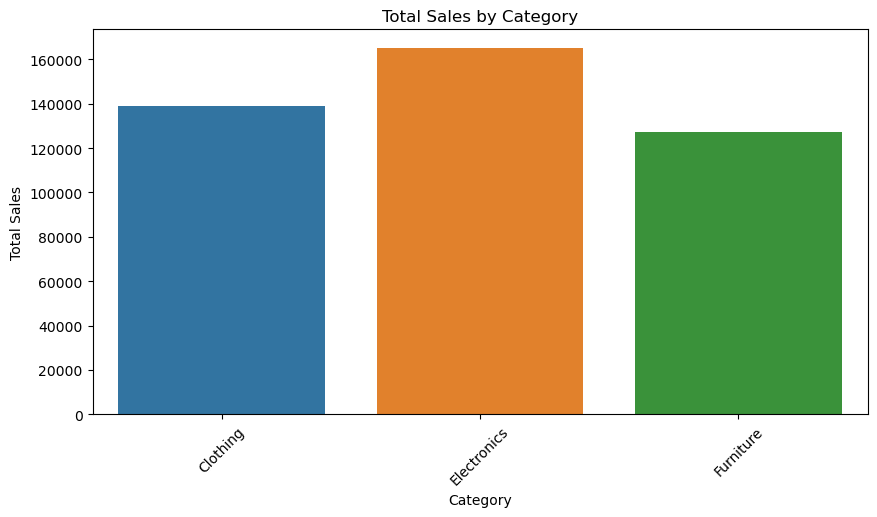

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Total Sales", data=category_analysis)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

# Part 2: Target Achievement Analysis 
• Using the Sales Target dataset, calculate the percentage change in target sales 
for the Furniture category month-over-month. 

• Analyse the trends to identify months with significant target fluctuations. 
Suggest strategies for aligning target expectations with actual performance 
trends.

In [56]:
# Target Achievement Analysis
furniture_sales = sales_target[sales_target["Category"] == "Furniture"]
furniture_sales

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [60]:
furniture_sales["Month-over-Month Change (%)"] = furniture_sales["Target"].pct_change() * 100
furniture_sales.head()

C:\Users\91886\AppData\Local\Temp\ipykernel_16272\2810077930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_sales["Month-over-Month Change (%)"] = furniture_sales["Target"].pct_change() * 100


,Month of Order Date,Category,Target,Month-over-Month Change (%)
0,Apr-18,Furniture,10400.0,NaN
1,May-18,Furniture,10500.0,0.961538
2,Jun-18,Furniture,10600.0,0.952381
3,Jul-18,Furniture,10800.0,1.886792
4,Aug-18,Furniture,10900.0,0.925926


# Part 3: Regional Performance Insights 
• From the List of Orders dataset, identify the top 5 states with the highest order 
count. For each of these states, calculate the total sales and average profit. 

• Highlight any regional disparities in sales or profitability. Suggest regions or cities 
that should be prioritized for improvement. 

In [69]:
# Regional Performance Insights
top_states = orders["State"].value_counts().head(5).index
top_states

Index(['Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Punjab'], dtype='object', name='State')

In [70]:
top_states_data = merged_data[merged_data["State"].isin(top_states)]
top_states_data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [71]:
state_analysis = top_states_data.groupby("State").agg({"Amount": "sum", "Profit": "mean"}).reset_index()
state_analysis.columns = ["State", "Total Sales", "Average Profit"]
state_analysis.head()

,State,Total Sales,Average Profit
0,Gujarat,21058.0,5.344828
1,Madhya Pradesh,105140.0,16.326471
2,Maharashtra,95348.0,21.296552
3,Punjab,16786.0,-10.150000
4,Rajasthan,21149.0,16.986486


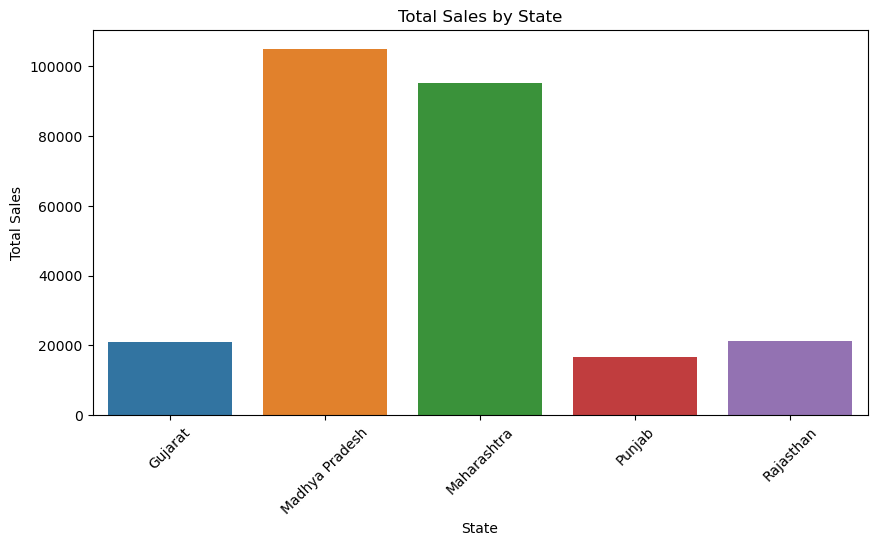

In [72]:
# Visualization: Sales by State
plt.figure(figsize=(10, 5))
sns.barplot(x="State", y="Total Sales", data=state_analysis)
plt.title("Total Sales by State")
plt.xticks(rotation=45)
plt.show()

# Question 2 :
App Exploration: 
Explore the features and user experience of the Jar app. Highlight five things you found 
particularly e ective and user-friendly. Additionally, identify five areas where 
improvements could be made, providing your reasoning for each suggestion. 

# Five Effective & User-Friendly Features:
These are the strengths of the Jar App that enhance user experience:

1️.Automated Micro-Savings
The app rounds off daily expenses and automatically saves the difference in digital gold.
This makes saving effortless for users, especially those who struggle with manual savings.

2️.Simple & Clean User Interface (UI)
The app has a minimalistic design with easy navigation, making it accessible for users of all age groups.
Even beginners with little financial knowledge can use it effortlessly.

3️.Instant Digital Gold Purchase & Withdrawal
Users can start investing with as little as ₹10 and withdraw their digital gold anytime.
This makes investing flexible and accessible to everyone.

4️.Secure Transactions & Bank Integration
The app offers bank-level encryption and UPI integration, ensuring secure transactions.
It also supports auto-debit features, making saving hassle-free.

5️.Rewards & Gamification
Jar offers daily streak rewards and cashback to keep users engaged.
This motivates users to save regularly while enjoying a rewarding experience.

# Five Areas for Improvement & Suggestions:
1️.Limited Investment Options
Currently, users can only invest in digital gold.
Suggestion: Add mutual funds, fixed deposits, or stock investments to give users more financial growth options.

2️.No Goal-Based Savings Feature
Users can save money, but there are no specific savings goals (e.g., buying a car, education fund).
Suggestion: Introduce a “Goal-Based Savings” feature where users can set and track their financial goals.

3️.Lack of Personalized Insights
The app does not provide detailed analytics on spending habits or savings patterns.
Suggestion: Add a dashboard with insights like monthly savings reports, spending trends, and personalized recommendations.

4️.Customer Support Could Be Improved
Currently, support is mainly via email, which takes time for response and resolution.
Suggestion: Implement live chat or in-app customer support for instant issue resolution.

5️.Limited Withdrawal Flexibility
Users can only withdraw digital gold in cash, but not in the form of physical gold.
Suggestion: Allow users to redeem their savings as physical gold coins or jewelry for better flexibility.


# Question 3: (10 marks) 
Product Exploration: 
The Jar app provides users with an innovative way to save and invest in digital gold, 
starting with as little as ₹10. It automates savings and investments, making financial 
planning seamless and accessible. As the first Made-in-India app to pioneer such a 
solution, Jar has successfully created a niche in automated savings and investment. 
Building on its strong foundation and leveraging its existing user base and trust, what 
are some new business opportunities Jar could venture into, to expand its o erings and 
enhance user engagement? Discuss how the app can utilize its strengths, such as 
automation, a user-friendly design, and established credibility, to seamlessly integrate 
these new services, deepen its value proposition, and achieve significant milestones in 
the financial ecosystem. 

# New Business Opportunities for Jar App
1.Micro-Investments in Mutual Funds & Stocks
What:Allow users to invest small amounts in mutual funds, exchange-traded funds (ETFs), and stocks directly from the app.
Why:Many beginners want to invest in the stock market but lack knowledge. Jar can provide a simple, automated investment process just like it does with gold.
How:
Offer low-risk mutual funds (SIPs) with automated monthly investments.
Introduce a fractional investment option for stocks (e.g., invest ₹100 in Tesla or TCS).
Use AI-based portfolio recommendations based on user spending habits.

2️.Smart Goal-Based Savings Plans
What: Users can set personalized savings goals for vacations, education, home purchases, or emergency funds.
Why: Many users struggle with saving discipline, and goal-based savings provide motivation.
How:
Users choose a goal (e.g., “Save ₹50,000 for a laptop in 1 year”).
The app automatically deducts small amounts daily or weekly to reach the goal.
Visual progress trackers keep users engaged.

3.Digital Gold-Backed Loans
What: Allow users to take small loans against their digital gold savings.
Why: Many users may need quick cash but don’t want to sell their gold.
How:
Users pledge their digital gold as collateral.
They receive instant small loans (₹500 - ₹10,000) at lower interest rates than personal loans.
Repayments can be auto-deducted from future savings.

4️.Insurance & Financial Protection Plans
What: Offer micro-insurance for health, life, and accidents directly in the app.
Why: Many low-income and young users don’t have insurance but can afford small monthly premiums.
How:
Auto-deduct ₹50-₹200 per month for micro-insurance plans.
Partner with leading insurance companies.
Provide instant claims processing via the app.

5️.Expense & Budget Management
What:Introduce an AI-powered expense tracker to help users analyze and manage spending.
Why: Users who save money also need better financial planning.
How:
Categorize expenses (e.g., food, shopping, rent).
Provide personalized saving tips based on spending habits.
Offer “Spend Less, Save More” challenges to engage users.